In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the data
input_data = pd.read_csv("input.csv", header=None)
full_data = pd.read_csv("loan_data.csv")

In [3]:
#Viewing first 5 rows
full_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
#Viewing the shape of dataset
full_data.shape

(9578, 14)

In [5]:
input_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0


In [6]:
input_data.shape

(9578, 18)

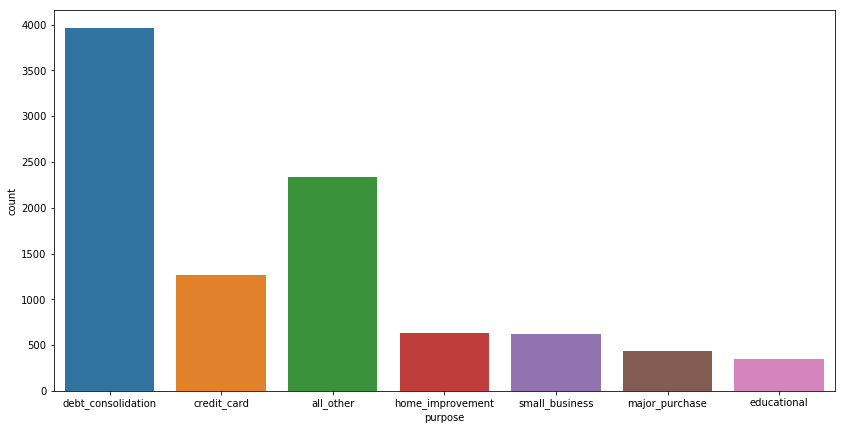

In [7]:
#Plotting the purpose column of dataset
plt.figure(figsize=(14,7))
sns.countplot(full_data['purpose'])

In [8]:
#Viewing unique values and their count
full_data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [9]:
full_data["delinq.2yrs"].value_counts()

0     8458
1      832
2      192
3       65
4       19
5        6
6        2
7        1
13       1
11       1
8        1
Name: delinq.2yrs, dtype: int64

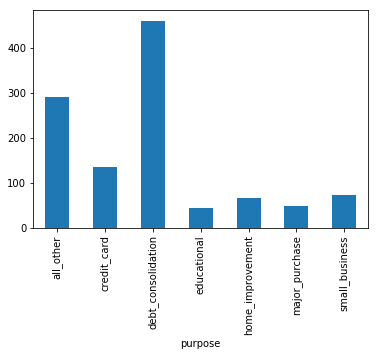

In [10]:
#Grouping Purpose and delinq.2yrs column and then plotting
full_data[full_data['delinq.2yrs'] != 0].groupby('purpose').fico.count().plot(kind='bar')

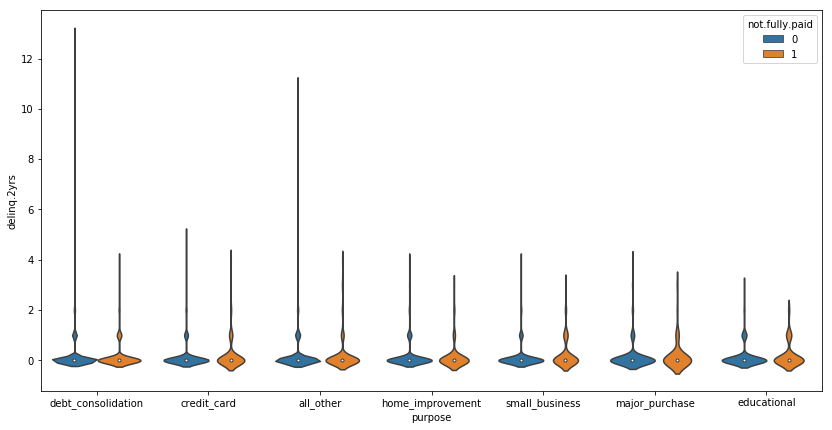

In [11]:
plt.figure(figsize=(14,7))
sns.violinplot(x='purpose', y='delinq.2yrs', hue='not.fully.paid', data=full_data)

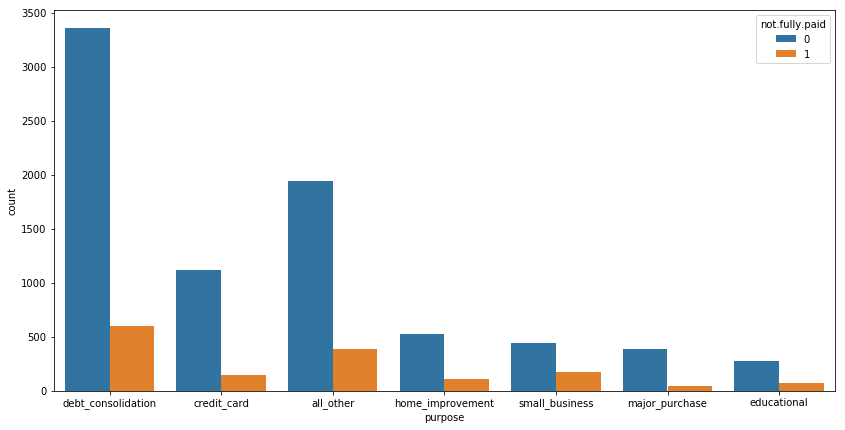

In [12]:
plt.figure(figsize=(14,7))
sns.countplot(data=full_data, x='purpose', hue='not.fully.paid')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


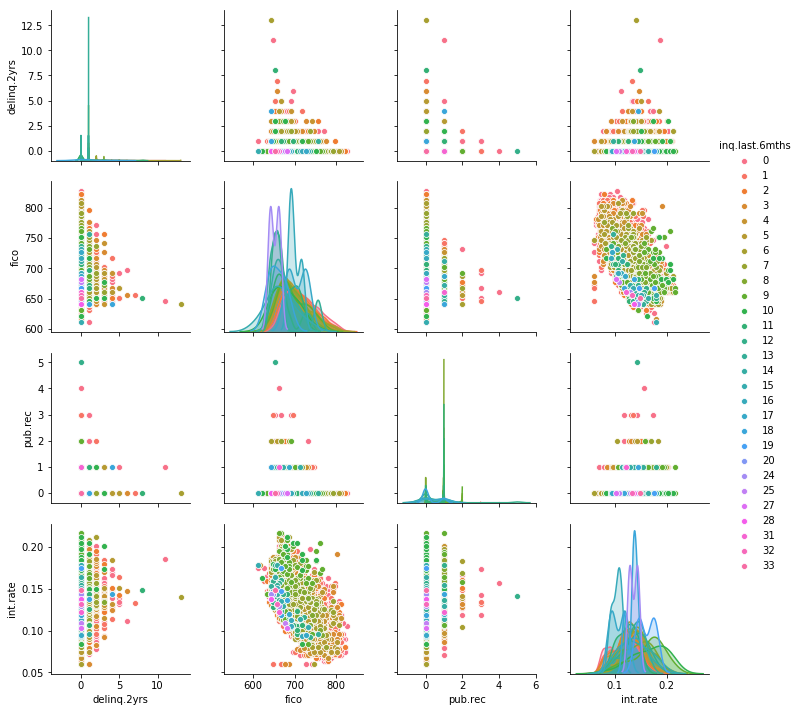

In [13]:
sns.pairplot(vars=['delinq.2yrs','fico','pub.rec','int.rate'], hue='inq.last.6mths', data=full_data)

In [14]:
#Applying LabelEncoder to purpose column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
full_data.purpose = le.fit_transform(full_data.purpose)

In [15]:
#Viewing all the classes
le.classes_

array(['all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype=object)

In [16]:
np.unique(full_data.purpose)

array([0, 1, 2, 3, 4, 5, 6])

In [17]:
#Checking the datatypes of each column
full_data.dtypes

credit.policy          int64
purpose                int64
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

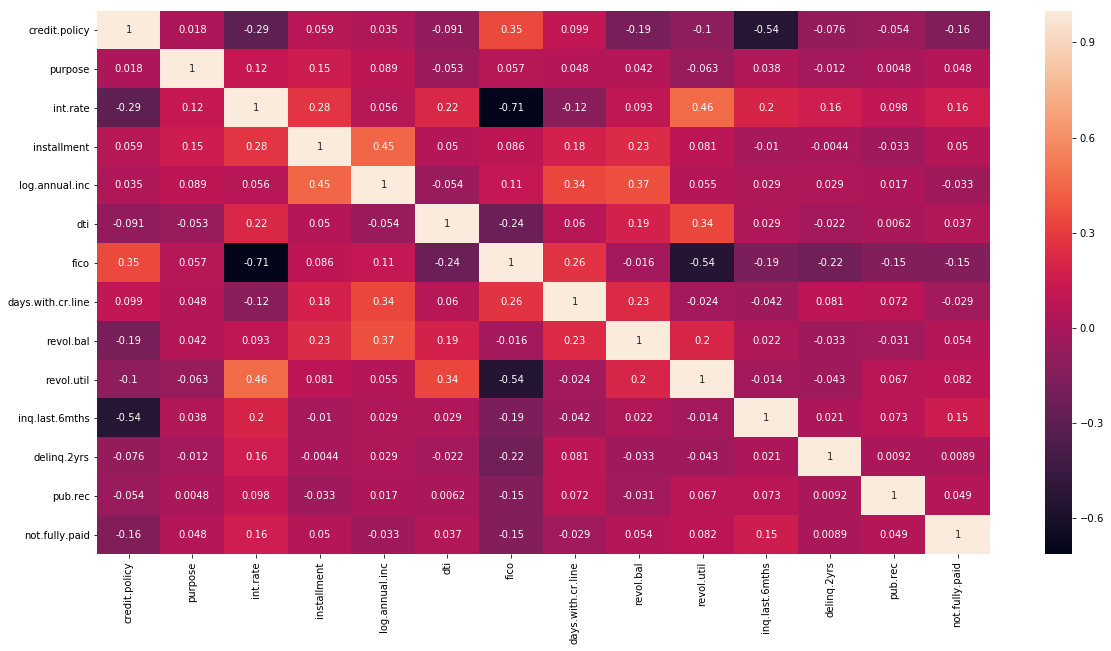

In [18]:
#Viewing the correlation between the columns
corrMap = full_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corrMap, annot=True)

In [19]:
#Importing th output file
labels = pd.read_csv('output.csv', header=None)

In [20]:
#Viewing the first 5 rows of output dataset
labels.head()

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [21]:
#Viewing the shape of output dataset
labels.shape

(9578, 2)

In [22]:
#Doing train and test split of the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, labels, test_size = 0.25, random_state=31)

In [23]:
#Shape of x_train
x_train.shape

(7183, 18)

In [24]:
#Shape of y_train
y_train.shape

(7183, 2)

In [25]:
#Shape of x_test
x_test.shape

(2395, 18)

In [26]:
#Shape of y_test
y_test.shape

(2395, 2)

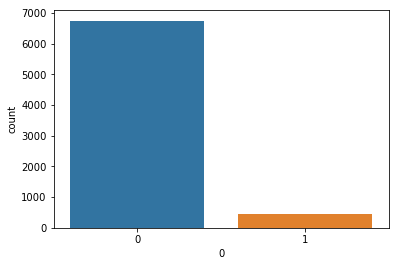

In [27]:
#Countplot of y_train
sns.countplot(y_train.iloc[:,0])

In [28]:
#Importing required libraries
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Input
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard
np.random.seed(42)

Using TensorFlow backend.


In [29]:
#Building a sequential CNN Model
dnnmodel = Sequential()
dnnmodel.add(Dense(12, input_dim = 18, activation='relu'))
dnnmodel.add(Dropout(0.2))
dnnmodel.add(Dense(24, activation='relu'))
dnnmodel.add(Dropout(0.2))
dnnmodel.add(Dense(36, activation='relu'))
dnnmodel.add(Dropout(0.2))
dnnmodel.add(Dense(2, activation='sigmoid'))
print(dnnmodel.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                228       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                312       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 36)                900       
_________________________________________________________________
dropout_3 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [30]:
#Compiling the CNN model
dnnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
dnnmodel.fit(x_train, y_train, epochs=50, batch_size=30 )

Epoch 1/50
7183/7183 [==============================] - 2s 219us/step - loss: 116.3775 - accuracy: 0.8108
Epoch 2/50
7183/7183 [==============================] - 1s 77us/step - loss: 36.9613 - accuracy: 0.8480
Epoch 3/50
7183/7183 [==============================] - 1s 81us/step - loss: 23.9156 - accuracy: 0.8410
Epoch 4/50
7183/7183 [==============================] - 1s 71us/step - loss: 10.9407 - accuracy: 0.8554
Epoch 5/50
7183/7183 [==============================] - 1s 71us/step - loss: 7.9094 - accuracy: 0.8730
Epoch 6/50
7183/7183 [==============================] - 1s 71us/step - loss: 4.3781 - accuracy: 0.9016
Epoch 7/50
7183/7183 [==============================] - 1s 71us/step - loss: 3.5234 - accuracy: 0.9128
Epoch 8/50
7183/7183 [==============================] - 1s 71us/step - loss: 2.8232 - accuracy: 0.9177
Epoch 9/50
7183/7183 [==============================] - 1s 71us/step - loss: 1.7447 - accuracy: 0.9259
Epoch 10/50
7183/7183 [==============================] - 1s 71us/st

In [31]:
#Predicting the result of model with Confusion Matrix
predictions = dnnmodel.predict(x_test)
def convertTobinary(dec):
    if dec< 0.5:
        return 0
    else:
        return 1
predictions_df = pd.DataFrame(predictions)
predictions_df.iloc[:,0] = predictions_df.iloc[:,0].apply(convertTobinary) 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test.iloc[:,0], predictions_df.iloc[:,0]))

[[2216    0]
 [ 179    0]]


In [32]:
#Importing the required libraries for Autoencoder model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [33]:
#Training and building the Autoencoder Model
input_dim = x_train.shape[1]
encoding_dim = 9
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)

decoder = Dense(input_dim, activation='tanh')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [34]:
#Compliling the Autoencoder model
nb_epoch = 150
batch_size = 36

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(x_train_sc, x_train_sc,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_test_sc, x_test_sc),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 7183 samples, validate on 2395 samples
Epoch 1/150
7183/7183 [==============================] - 1s 136us/step - loss: 0.3460 - accuracy: 0.6560 - val_loss: 0.2278 - val_accuracy: 0.8096
Epoch 2/150
7183/7183 [==============================] - 0s 49us/step - loss: 0.1945 - accuracy: 0.7660 - val_loss: 0.1679 - val_accuracy: 0.6956
Epoch 3/150
7183/7183 [==============================] - 0s 59us/step - loss: 0.1455 - accuracy: 0.6178 - val_loss: 0.1263 - val_accuracy: 0.5491
Epoch 4/150
7183/7183 [==============================] - 0s 49us/step - loss: 0.1107 - accuracy: 0.5460 - val_loss: 0.0968 - val_accuracy: 0.5524
Epoch 5/150
7183/7183 [==============================] - 0s 50us/step - loss: 0.0868 - accuracy: 0.5847 - val_loss: 0.0774 - val_accuracy: 0.6038
Epoch 6/150
7183/7183 [==============================] - 0s 53us/step - loss: 0.0711 - accuracy: 0.6457 - val_loss: 0.0647 - val_accuracy: 0.6434
Epoch 7/150
7183/7183 [==============================] - 0s 51us/step - los

In [35]:
autoencoder = load_model('model.h5')

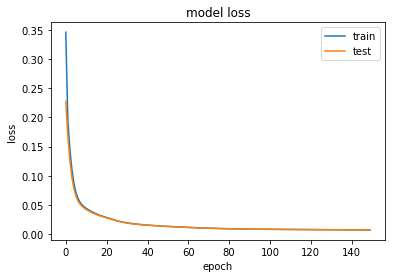

In [36]:
#Plotting the results
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [37]:
#Predicting from the Autoencoder model
predictions = autoencoder.predict(x_test_sc)

In [38]:
#Finding error
mse = np.mean(np.power(x_test_sc - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test.iloc[:,0]})

In [39]:
error_df.describe()

,reconstruction_error,true_class
count,2395.000000,2395.000000
mean,0.005135,0.074739
std,0.008443,0.263025
min,0.000199,0.000000
25%,0.001596,0.000000
50%,0.002963,0.000000
75%,0.005768,0.000000
max,0.162753,1.000000


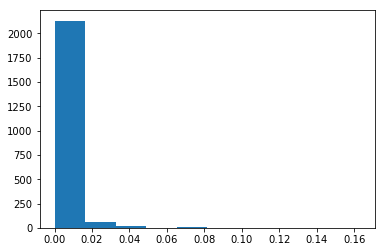

In [40]:
#Reconstruction error without fraud
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

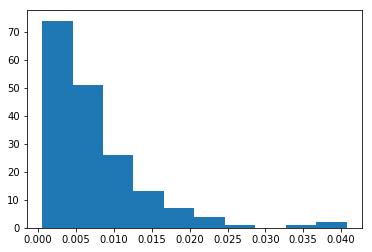

In [41]:
#Reconstruction error with fraud
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [42]:
#Importing libraries
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

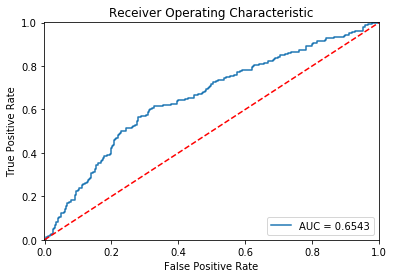

In [43]:
#Viewing Receiver Operating Characteristic
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

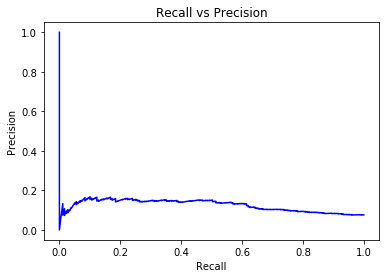

In [44]:
#Recall vs Precision
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

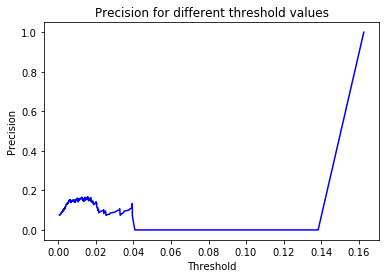

In [45]:
#Precision for different threshold values
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

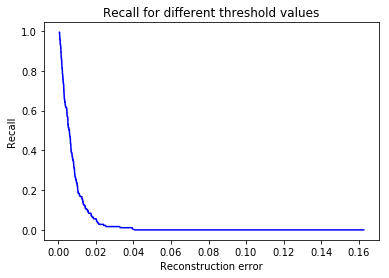

In [46]:
#Recall for different threshold values
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

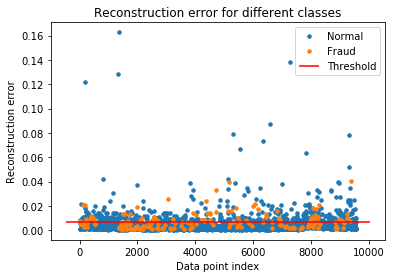

In [47]:
#Reconstruction error for different classes
threshold = 0.006671

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

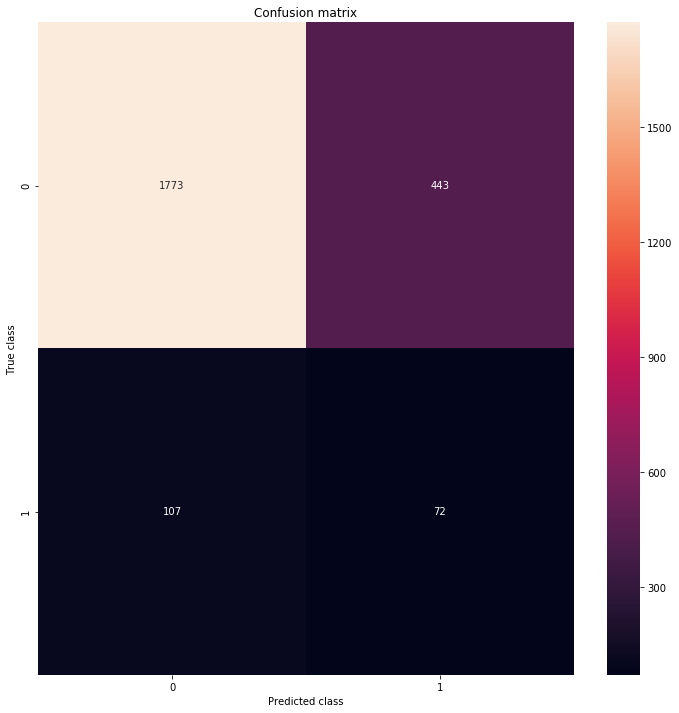

In [48]:
#Predicting the results and viewing Confusion Matrix
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()